# 線形サポートベクターマシン(LinerSVM)

マージン最大化、つまり他クラスと最も近い位置にいるもの同士(サポートベクトル)を基準として、そのユークリッド距離を最大化するように識別面を定める。境界を引くときに必要なデータはサポートベクトルだけになる。
決定境界が線形。特徴量が増えると(次元が多くなるほど)計算量が膨大、ただ次元が増えても精度は悪くない。

In [3]:
import pandas as pd
pd.options.display.float_format = '{:.4f}'.format

In [4]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.9000,3.0000,4.2000,1.5000,1
1,5.8000,2.6000,4.0000,1.2000,1
2,6.8000,3.0000,5.5000,2.1000,2
3,4.7000,3.2000,1.3000,0.2000,0
4,6.9000,3.1000,5.1000,2.3000,2


In [5]:
X_train = train.iloc[:,0:4]
y_train = train.iloc[:,4]
X_test = test.iloc[:,0:4]
y_test = test.iloc[:,4]

## 標準化

In [6]:
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()
scl.fit(X_train) #学習用データで標準化

X_train_std = scl.transform(X_train)
X_test_std = scl.transform(X_test)

In [7]:
pd.DataFrame(X_train_std).describe()


,0,1,2,3
count,112.0000,112.0000,112.0000,112.0000
mean,0.0000,0.0000,0.0000,-0.0000
std,1.0045,1.0045,1.0045,1.0045
min,-1.8291,-2.4221,-1.5042,-1.4438
25%,-0.9068,-0.5798,-1.2392,-1.1868
50%,-0.0998,-0.1193,0.2530,0.0987
75%,0.7071,0.5716,0.7830,0.8700
max,2.3211,3.1047,1.7313,1.6413


## 線形SVMの学習

In [14]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

params = {'C' : [0.001, 0.01, 0.1, 1, 10, 100]}


grid = GridSearchCV(
    estimator = LinearSVC(max_iter=50000),
    param_grid = params,
    cv = 5
)
grid.fit(X_train_std, y_train)

print("Best parameters : {}".format(grid.best_params_))
print("Best cross-validation score : {:.3f}".format(grid.best_score_))
print("score : {:.2f}%".format(grid.score(X_test_std, y_test)*100))

Best parameters : {'C': 100}
Best cross-validation score : 0.955
score : 97.37%


## 決定境界(Decision Boundaly)

/home/jovyan/work/public/iris分類アルゴリズム/script/decision_boundary.py:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
/home/jovyan/work/public/iris分類アルゴリズム/script/decision_boundary.py:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
/opt/conda/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number o

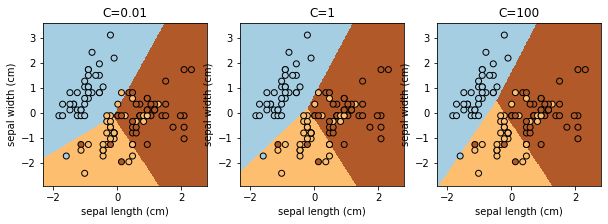

In [15]:
from script import decision_boundary
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC

# モジュールの再読み込み
# import importlib
# importlib.reload(decision_boundary)

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for ax, C in zip(axes, [0.01, 1, 100]):
    title = "C=%s"% (C)
    clf = LinearSVC(C=C)
    decision_boundary.decision_boundary(clf, X_train_std[:,0:2], y_train, ax,train.columns[0],train.columns[1],title)
